# Machine Learning Project

### Packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from numpy.random import random, seed
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from IPython.display import display
from scipy.stats import norm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
import itertools

## Functions

In [3]:
def drop_columns(boston_df, low_thresh, high_thresh=1, show=False):
    ''' Function takes in a value of thresholding and return the filtered dataframe, excluding already the target columns'''
    
    #print the correlation matrix
    corr_matrix = boston_df.corr().round(2)
    
    #show correlation matrix
    if show:
        sns.heatmap(data=corr_matrix, annot=True)
        
    array_corr = corr_matrix["MEDV"].abs()
    indices = np.arange(array_corr.shape[0])
    col_indi = indices[(array_corr < low_thresh) | (array_corr >= high_thresh)]
    filtered_boston = boston_df.drop(boston_df.columns[col_indi], axis=1)  
    print(filtered_boston.columns,filtered_boston.shape)
    return filtered_boston


def drop_columns(boston_df, low_thresh, high_thresh=1, show=False):
    ''' Function takes in a value of thresholding and return the filtered dataframe, excluding already the target columns'''
    
    
    #print the correlation matrix
    corr_matrix = boston_df.corr().round(2)
    
    #show correlation matrix
    if show:
        sns.heatmap(data=corr_matrix, annot=True)
        
    array_corr = corr_matrix["MEDV"].abs()
    indices = np.arange(array_corr.shape[0])
    
    col_indi = indices[(array_corr < low_thresh) | (array_corr >= high_thresh)]
    
    display(corr_matrix)
    
    #eliminating colinearity by selecting only one of more highly correlated features
    
    #colinearity threshold
    colin_thresh = 0.75
    
    colin_vars = []
    
    for ind,col in itertools.product(corr_matrix.columns,corr_matrix.index):
        if (abs(corr_matrix[ind][col])>colin_thresh and ind !=col):
            colin_vars.append((ind,col))
            
    colin_used = []
    for (ind1,ind2) in colin_vars:
        if not (ind1 in colin_used or ind2 in colin_used):
            colin_used.append(ind1)
    print(colin_used)
    
    filtered_boston = boston_df.drop(boston_df.columns[col_indi], axis=1).drop(colin_used, axis=1)
    
    print(filtered_boston.columns,filtered_boston.shape)
    
    return filtered_boston



#Important to split the data set before shuffling 
def bootstrap_OLS(X_train, X_test, z_train, z_test, n_bootstrap): 
    MSE = np.zeros((n_bootstrap,2))
    n = len(z_train)
    
    z_tilde_train_ols_aux = np.empty(n)
    z_tilde_test_ols_aux = np.empty(n)
    
    for i in range(n_bootstrap):
        sequence = np.random.randint(0,n,n)
        X1_train = X_train[sequence]
               
        z1_train = z_train[sequence]  
        
        
        z_tilde_train_ols_aux , z_tilde_test_ols_aux = OLS(X1_train, X_test, z1_train)
        
        MSE[i,0] = mean_squared_error(z1_train, z_tilde_train_ols_aux) 
        MSE[i,1] = mean_squared_error(z_test,z_tilde_test_ols_aux)  
        
    return MSE



def OLS(X_train, X_test, z_train):
    '''
    Fit the model with OLS regression using the train set and 
    returns the predicted values for both the train and the test set.
    '''
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train= scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    # # Apply the transform to both the training set and the test set

    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    z_train =np.asarray(z_train)                  # Series to array
    z_train = z_train.reshape(len(z_train),1)     # Reshape because standard scaler expects 2D

    target_scaler = StandardScaler()
    target_scaler.fit(z_train)
    z_train= target_scaler.transform(z_train)

    #extract regression coefficients
    beta_ols = np.linalg.pinv(X_train.T@X_train)@(X_train.T)@z_train
    
    #predict train and test values
    z_train_tilde_ols = X_train@beta_ols
    z_test_tilde_ols = X_test@beta_ols
    
    # Do the inverse transformation to compare the targets and find the MSE
        
    z_train = target_scaler.inverse_transform(z_train)
    z_train_tilde_ols = target_scaler.inverse_transform(z_train_tilde_ols)
    z_test_tilde_ols = target_scaler.inverse_transform(z_test_tilde_ols)
    
    return z_train_tilde_ols, z_test_tilde_ols



def Ridge(X_train,X_test,z_train,z_test,lambd):

    # Since it relates to remove intercepts, better to use built in function in SKL
    RegRidge = linear_model.Ridge(lambd,fit_intercept= True)
    
    # Scaling
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train= scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    # # Apply the transform to both the training set and the test set

    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    z_train =np.asarray(z_train)                  # Series to array
    z_train = z_train.reshape(len(z_train),1)     # Reshape because standard scaler expects 2D

    target_scaler = StandardScaler()
    target_scaler.fit(z_train)
    z_train= target_scaler.transform(z_train)
    
    #fit the model to the training data
    RegRidge.fit(X_train,z_train)
    
    # and then make the prediction
    z_tilde_train = RegRidge.predict(X_train)
    z_tilde_test = RegRidge.predict(X_test)
    
    # Do the inverse transformation to compare the targets and find the MSE
        
    z_train = target_scaler.inverse_transform(z_train)              # Not necessary because we dont compute MSE here
    z_tilde_train = target_scaler.inverse_transform(z_tilde_train)
    z_tilde_test = target_scaler.inverse_transform(z_tilde_test)
    
    return z_tilde_train, z_tilde_test

def bootstrap_Ridge(X_train, X_test, z_train, z_test, n_bootstrap, lambd): 
    n = len(z_train)
    #prepare arrays for output
    MSE = np.zeros((n_bootstrap,2))
#     z_tilde_train = np.zeros((len(z_train), n_bootstrap))
#     z_tilde_test = np.zeros((len(z_test), n_bootstrap))
    
    z_tilde_train_aux = np.empty(n)
    z_tilde_test_aux = np.empty(n)
    
    
    
    #cycle on resamplings
    for i in range(n_bootstrap):
        
        #extract sequence for resampling
        sequence = np.random.randint(0,n,n)
        
        #resampled arrays
        X1_train = X_train[sequence]
        z1_train = z_train[sequence]
        
        #fit and predict
        z_tilde_train_aux , z_tilde_test_aux = Ridge(X1_train, X_test, z1_train, z_test, lambd)
        
        #calculate mse on train and test
        MSE[i,0] = mean_squared_error(z1_train,z_tilde_train_aux)
        MSE[i,1] = mean_squared_error(z_test,z_tilde_test_aux)
    
      #  MSE_train_mean = np.mean(MSE[:,0])
      #  MSE_test_mean = np.mean(MSE[:,1])
        
    return z_tilde_train_aux, z_tilde_test_aux, MSE

def cross_validation_Ridge(k_folds, X, z, lambd):
    MSE_train = []
    MSE_test = []
    kfold = KFold(n_splits = k_folds)

    for train_inds, test_inds in kfold.split(X):
        
        X_train = X[train_inds]
        z_train = z[train_inds]

        X_test = X[test_inds]
        z_test = z[test_inds]

        z_train_tilde_Ridge, z_test_tilde_Ridge = Ridge( X_train, X_test, z_train, z_test, lambd)
        
        MSE_train.append(mean_squared_error(z_train, z_train_tilde_Ridge))
        MSE_test.append(mean_squared_error(z_test, z_test_tilde_Ridge))

    MSE_train_mean = np.mean(MSE_train)
    MSE_test_mean = np.mean(MSE_test)
    
    return MSE_train_mean, MSE_test_mean

def cross_validation_OLS(k_folds, X, z):
    MSE_train = []
    MSE_test = []
    kfold = KFold(n_splits = k_folds)
    for train_inds, test_inds in kfold.split(X):
        X_train = X[train_inds]
        z_train = z[train_inds]
        
        X_test = X[test_inds]
        z_test = z[test_inds]
        
        z_train_tilde_ols , z_test_tilde_ols = OLS(X_train, X_test, z_train)
        
        MSE_train.append(mean_squared_error(z_train, z_train_tilde_ols))
        MSE_test.append(mean_squared_error(z_test, z_test_tilde_ols))
        
    MSE_train_mean = np.mean(MSE_train)
    MSE_test_mean = np.mean(MSE_test)
    return MSE_train_mean, MSE_test_mean
    

## Data 

In [4]:
boston_data = load_boston()
boston_df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
boston_df['MEDV'] = boston_data.target
features = boston_df.columns.tolist() 
print(features[:-1])
print("Size of data set: {} ".format(boston_df.shape))

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
Size of data set: (506, 14) 


/home/nucphys/miniconda3/envs/py3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Californi

In [5]:
#x = drop_columns(boston_df,0.3)
x = boston_df.drop("MEDV",axis=1)
z = boston_df['MEDV']
pca = PCA(n_components=0.95)



## 1. OLS using no resampling method

Degree 0
MSE train  19.068341850927226
MSE test 30.697037704088583
9
Degree 1
MSE train  5.329363416561504
MSE test 18.1280301156912
12
Degree 2
MSE train  1.5616266578943886e-12
MSE test 16499.784897125715
16
Degree 3
MSE train  3.578071793240294e-08
MSE test 1433.9816113724485
18


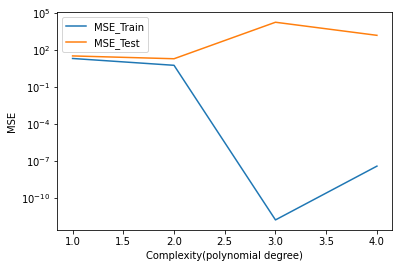

Minimum MSE reached : 18.1 
 for degree : 2.0


In [6]:
#degree of the polynomial model
maxdegree = 4

#target feature


polydegree = np.zeros(maxdegree)
MSE_OLS = np.zeros((maxdegree,2))




for degree in range(maxdegree):
    
    #set up the model
    poly = PolynomialFeatures(degree+1)
    
    X = poly.fit_transform(x)
    
    
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.3, random_state = 5)
    
    polydegree[degree] = degree+1
    
    z_train_tilde_ols , z_test_tilde_ols = OLS(X_train, X_test, z_train) 
    
    MSE_OLS[degree, 0] = mean_squared_error(z_train,z_train_tilde_ols)
    MSE_OLS[degree, 1] = mean_squared_error(z_test,z_test_tilde_ols) 
    print("Degree",degree)
    print("MSE train ",MSE_OLS[degree, 0])
    print("MSE test", MSE_OLS[degree, 1])
    print(pca.n_components_)
#plot the results
plt.figure()
plt.plot(polydegree,MSE_OLS[:,0],label='MSE_Train')
plt.plot(polydegree,MSE_OLS[:,1],label='MSE_Test')
plt.xlabel('Complexity(polynomial degree)')
plt.ylabel('MSE')
#plt.ylim(0,1000)
plt.yscale("log")
plt.legend()
plt.show()

print("Minimum MSE reached : {:.1f} \n for degree : {}".format(np.min(MSE_OLS[:,1]),polydegree[np.argmin(MSE_OLS[:,1])]))

## 2. OLS with resampling methods

For degree  1
MSE_boot_train  20.325587021241606
MSE_boot_test  23.960071017526467
MSE_cv_train  21.336369047117806
MSE_cv_test  32.09065633102584
For degree  2
MSE_boot_train  2.829766481046069
MSE_boot_test  80.84119497242905
MSE_cv_train  5.46419342863866
MSE_cv_test  109.30158810082537
For degree  3
MSE_boot_train  8.313401947103262e-17
MSE_boot_test  1109.455386661474
MSE_cv_train  0.0920386408689772
MSE_cv_test  15544951.948099006


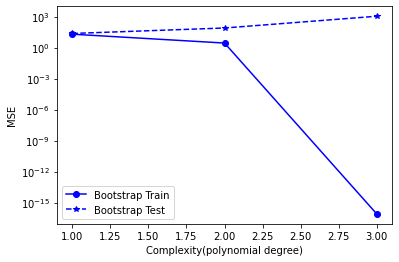

Bootstrap: 
 Minimum MSE reached : 24.0 
 for degree : 1.0

CV: 
 Minimum MSE reached : 32.1 
 for degree : 1.0



In [7]:
#degree of the polynomial model
maxdegree = 3

n_bs = 50

k_folds = 8


polydegree = np.zeros(maxdegree)
MSE_boot = np.zeros((maxdegree,2))
MSE_cv = np.zeros((maxdegree,2))

for degree in range(maxdegree):
    
    #set up the model
    poly = PolynomialFeatures(degree+1)
    
    X = poly.fit_transform(x)
    
    
    X_train, X_test, z_train, z_test = train_test_split(np.array(X), np.array(z), test_size=0.3, random_state = 2)
    
    polydegree[degree] = degree+1
    
    MSE_boot_deg = bootstrap_OLS(X_train, X_test, z_train, z_test, n_bs)
    
    MSE_boot[degree, 0] = np.mean(MSE_boot_deg[:,0])
    MSE_boot[degree, 1] = np.mean(MSE_boot_deg[:,1])
    
    MSE_cv[degree, 0], MSE_cv[degree, 1] = cross_validation_OLS(k_folds,X,z)
     
    print("For degree ",degree+1)
    print("MSE_boot_train ",MSE_boot[degree, 0])
    print("MSE_boot_test ",MSE_boot[degree, 1])
    print("MSE_cv_train ",MSE_cv[degree, 0])
    print("MSE_cv_test ",MSE_cv[degree, 1])
        
        
#plot the results
plt.plot(polydegree,MSE_boot[:,0],"bo-",label='Bootstrap Train')
plt.plot(polydegree,MSE_boot[:,1],"b*--",label='Bootstrap Test')
# plt.plot(polydegree,MSE_cv[:,0],"ro-",label='Cross Validation Train')
# plt.plot(polydegree,MSE_cv[:,1],"r*--",label='Cross Validation Test')
plt.xlabel('Complexity(polynomial degree)')
plt.ylabel('MSE')
plt.yscale("log")
plt.legend()
plt.show()

print("Bootstrap: \n Minimum MSE reached : {:.1f} \n for degree : {}\n".format(np.min(MSE_boot[:,1]),polydegree[np.argmin(MSE_boot[:,1])]))


print("CV: \n Minimum MSE reached : {:.1f} \n for degree : {}\n".format(np.min(MSE_cv[:,1]),polydegree[np.argmin(MSE_cv[:,1])]))


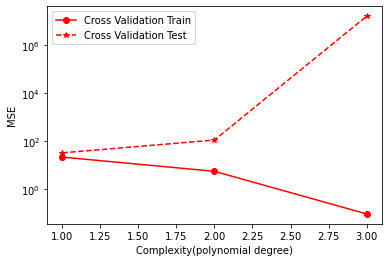

In [8]:
plt.plot(polydegree,MSE_cv[:,0],"ro-",label='Cross Validation Train')
plt.plot(polydegree,MSE_cv[:,1],"r*--",label='Cross Validation Test')
plt.xlabel('Complexity(polynomial degree)')
plt.ylabel('MSE')
plt.yscale("log")
plt.legend()
plt.show()

## 3. Ridge regression without resampling methods

Minimum MSE reached : 12.5 
 for lambda : 33.9322177189533



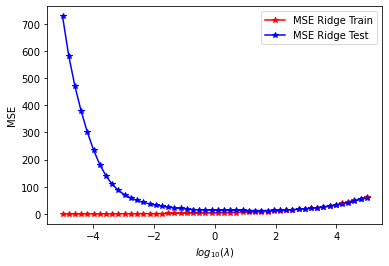

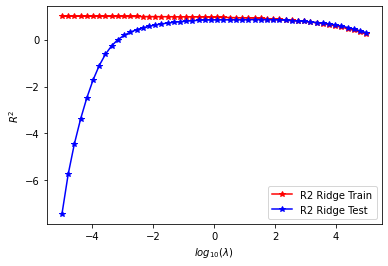

In [9]:
#Let's apply the Ridge regression

sel_degree = 2
nlambdas = 50 
lambd = np.logspace(-5,5, nlambdas)

MSE_Ridge = np.zeros((len(lambd),2))
R2_Ridge = np.zeros((len(lambd),2))

#Here 0.5 gives much better result compaire with 0.4 and 0.3 

#set up the model
poly = PolynomialFeatures(sel_degree+1)

X = poly.fit_transform(x)

X_train, X_test, z_train, z_test = train_test_split(np.array(X), np.array(z), test_size=0.3, random_state = 2)

for i in range(nlambdas):
    z_tilde_train, z_tilde_test = Ridge(X_train,X_test,z_train,z_test,lambd[i])
    MSE_Ridge[i,0] = mean_squared_error(z_train, z_tilde_train)
    MSE_Ridge[i,1] = mean_squared_error(z_test, z_tilde_test)
    R2_Ridge[i, 0] = r2_score(z_train, z_tilde_train)
    R2_Ridge[i, 1] = r2_score(z_test, z_tilde_test)
    #print(MSE_Ridge[i,1])
        
plt.figure()
plt.plot(np.log10(lambd), MSE_Ridge[:,0], 'r*-', label = 'MSE Ridge Train')
plt.plot(np.log10(lambd), MSE_Ridge[:,1], 'b*-', label = 'MSE Ridge Test')
plt.xlabel('$log_{10}(\lambda)$')
plt.ylabel('MSE')
plt.legend()
#print('Lambda to obtain miminum MSE: {:.2f}'.format(lambd[np.argmin(MSE_Ridge[:,1])]))


print("Minimum MSE reached : {:.1f} \n for lambda : {}\n".format(np.min(MSE_Ridge[:,1]),lambd[np.argmin(MSE_Ridge[:,1])]))



plt.figure()
plt.plot(np.log10(lambd), R2_Ridge[:,0], 'r*-', label = 'R2 Ridge Train')
plt.plot(np.log10(lambd), R2_Ridge[:,1], 'b*-', label = 'R2 Ridge Test')
plt.xlabel('$log_{10}(\lambda)$')
plt.ylabel('$R^2$')

plt.legend()
plt.show()


In [ ]:
#Ridge
maxdegree = 9

nlambdas = 10 
lambdas = np.logspace(-1,2, nlambdas)


polydegree = np.zeros(maxdegree)

best_lambda = np.zeros(maxdegree)

mse_test_lambda = np.zeros(nlambdas)

MSE_ridge = np.zeros((maxdegree,2))

for degree in range(maxdegree):
    
    poly = PolynomialFeatures(degree+1)
    
    X = poly.fit_transform(x)
    
    #train-test split
    X_train, X_test, z_train, z_test = train_test_split(np.array(X), np.array(z), test_size=0.3, random_state = 2)
    
    for i in range(nlambdas):
        z_tilde_train, z_tilde_test = Ridge(X_train,X_test,z_train,z_test,lambdas[i])
        mse_test_lambda[i] = mean_squared_error(z_test, z_tilde_test)
        
    best_lambda[degree] = lambdas[np.argmin(mse_test_lambda)]
    #print(best_lambda)
    
    z_tilde_train, z_tilde_test = Ridge(X_train,X_test,z_train,z_test,best_lambda[degree])
    
    polydegree[degree] = degree + 1

    MSE_ridge[degree, 0] = mean_squared_error(z_tilde_train,z_train)
    MSE_ridge[degree, 1] = mean_squared_error(z_tilde_test,z_test)
    

plt.figure(figsize=(7,5))
plt.plot(polydegree, MSE_ridge[:, 0], "y", label='MSE Train')
plt.plot(polydegree, MSE_ridge[:, 1], "c", label='MSE Test')

print(" \n Minimum MSE reached : {:.1f} \n for degree : {}\n and lambda : {:}".format(np.min(MSE_ridge[:,1]),polydegree[np.argmin(MSE_ridge[:,1])],best_lambda[np.argmin(MSE_ridge[:,1])]))

plt.xlabel('Complexity(polynomial degree)')
#plt.yscale("log")
plt.legend()
plt.show()

In [ ]:
#Bootstrap-Ridge
maxdegree = 8

nlambdas = 50 
lambdas = np.logspace(-1,2, nlambdas)

n_bootstrap = 50

error_ridge = np.zeros(maxdegree)
bias_ridge = np.zeros(maxdegree)
variance_ridge = np.zeros(maxdegree)

polydegree = np.zeros(maxdegree)

best_lambda = np.zeros(maxdegree)

mse_test_lambda = np.zeros(nlambdas)

MSE_boot_ridge = np.zeros((maxdegree,2))

for degree in range(maxdegree):
    
    poly = PolynomialFeatures(degree+1)
    
    X = poly.fit_transform(x)

    
    #train-test split
    X_train, X_test, z_train, z_test = train_test_split(np.array(X), np.array(z), test_size=0.3, random_state = 2)
 

    for i in range(nlambdas):
        _,_, mse_ridge = bootstrap_Ridge(X_train, X_test, z_train, z_test, n_bootstrap, lambdas[i])
        mse_test_lambda[i] = np.mean(mse_ridge[:,1])
    
    best_lambda[degree] = lambdas[np.argmin(mse_test_lambda)]
    
    z_train_ridge, z_pred_ridge, mse_ridge = bootstrap_Ridge(X_train, X_test, z_train, z_test, n_bootstrap, best_lambda[degree])
    
    
    #reshape test values
    z_t = z_test.reshape(len(z_test),1)
    polydegree[degree] = degree + 1
    
    MSE_boot_ridge[degree, 0] = np.mean(mse_ridge[:,0]) 
    MSE_boot_ridge[degree, 1] = np.mean(mse_ridge[:,1]) 
    

plt.figure(figsize=(7,5))
plt.plot(polydegree, MSE_boot_ridge[:, 0], "y", label='MSE Train')
plt.plot(polydegree, MSE_boot_ridge[:, 1], "c", label='MSE Test')



print("Bootstrap: \n Minimum MSE reached : {:.1f} \n for degree : {}\n and lambda : {:.2f}".format(np.min(MSE_boot_ridge[:,1]),polydegree[np.argmin(MSE_boot_ridge[:,1])],best_lambda[np.argmin(MSE_boot_ridge[:,1])]))

plt.xlabel('Complexity(polynomial degree)')
#plt.yscale("log")
plt.legend()
plt.show()

In [ ]:
#Cross-Validation
maxdegree = 4

k_folds = 10

nlambdas = 10 
lambdas = np.logspace(-1,2, nlambdas)
best_lambda = np.zeros(maxdegree)
MSE_cross_Ridge = np.zeros((maxdegree,2))

mse_test_lambda = np.zeros(nlambdas)

for degree in range(maxdegree):
    
    poly = PolynomialFeatures(degree+1)
    
    X = poly.fit_transform(x)
    

    for i in range(nlambdas):
        _, mse_test_lambda[i] = cross_validation_Ridge(k_folds,X,z,lambdas[i])
    
    best_lambda[degree] = lambdas[np.argmin(mse_test_lambda)]
    
    MSE_cross_Ridge[degree,0], MSE_cross_Ridge[degree,1]  = cross_validation_Ridge(k_folds,X,z,best_lambda[degree])
    

plt.plot(range(1,maxdegree+1),MSE_cross_Ridge[:,0], 'r*-', label = 'MSE Ridge Train')
plt.plot(range(1,maxdegree+1),MSE_cross_Ridge[:,1], 'b*-', label = 'MSE Ridge Test')
plt.xlabel('Complexity(polynomial degree')
plt.ylabel('MSE')
plt.legend()

print("CV: \n Minimum MSE reached : {:.1f} \n for degree : {}\n and lambda : {:.2f}".format(np.min(MSE_cross_Ridge[:,1]),polydegree[np.argmin(MSE_cross_Ridge[:,1])],best_lambda[np.argmin(MSE_cross_Ridge[:,1])]))


In [ ]:
plt.plot(range(1,maxdegree+1),MSE_cross_Ridge[:,0], 'r*-', label = 'MSE Ridge Train')
plt.plot(range(1,maxdegree+1),MSE_cross_Ridge[:,1], 'b*-', label = 'MSE Ridge Test')
plt.xlabel('Complexity(polynomial degree')
plt.ylabel('MSE')
plt.yscale("log")
plt.legend()

print("CV: \n Minimum MSE reached : {:.1f} \n for degree : {}\n and lambda : {:.2f}".format(np.min(MSE_cross_Ridge[:,1]),polydegree[np.argmin(MSE_cross_Ridge[:,1])],best_lambda[np.argmin(MSE_cross_Ridge[:,1])]))
print(MSE_cross_Ridge[:,1])